# Gensim word vector visualization of various word vectors

In [1]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-09-10 10:07:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-10 10:07:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-10 10:07:28--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [5]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [6]:
!ls

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data


In [8]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [9]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [11]:
model.most_similar('trump')

[('nows', 0.5873242616653442),
 ('hilton', 0.5507662892341614),
 ('casino', 0.5180235505104065),
 ('ivanka', 0.5056729316711426),
 ('mih', 0.47354456782341003),
 ('mahal', 0.47065550088882446),
 ('taj', 0.4643707275390625),
 ('condo', 0.46357983350753784),
 ('vegas', 0.4624684453010559),
 ('developer', 0.46145099401474)]

In [12]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [14]:
model.most_similar(negative='trump')

[('http://www.opel.com', 0.5991321802139282),
 ('rw95', 0.577193021774292),
 ('umbrians', 0.5760494470596313),
 ('str94', 0.5753774642944336),
 ('js04bb', 0.5674892663955688),
 ('http://www.ecb.int', 0.5536001920700073),
 ('pindaris', 0.550962507724762),
 ('kd95', 0.5492748022079468),
 ('mattersdorf', 0.5490797162055969),
 ('greg.wilcoxdailynews.com', 0.5472217798233032)]

In [15]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [16]:
result

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755735874176025),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534753799438),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.6311717629432678),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [17]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

![Analogy](imgs/word2vec-king-queen-composition.png)

In [18]:
analogy('japan', 'japanese', 'australia')

'australian'

In [19]:
analogy('australia', 'beer', 'france')

'champagne'

In [20]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [21]:
analogy('tall', 'tallest', 'long')

'longest'

In [22]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [23]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [24]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [25]:
model['coffee']

array([ 0.12632  ,  0.86414  , -0.46052  ,  0.26095  ,  0.077033 ,
        0.076186 ,  0.71959  ,  0.38122  , -0.10287  , -0.44388  ,
       -0.52962  , -1.0485   , -0.0086082,  0.74915  , -0.15369  ,
        0.13386  ,  0.27879  , -0.46137  ,  0.24354  , -0.2938   ,
        0.018044 ,  0.63083  ,  0.7563   , -0.53305  , -0.087608 ,
        0.64316  ,  0.32683  , -0.80606  , -0.43119  , -0.20887  ,
        0.04233  ,  0.353    ,  0.88587  , -0.19565  ,  0.089291 ,
        1.2422   ,  0.30059  ,  0.11292  ,  0.58895  , -1.1495   ,
        0.04609  , -0.6724   ,  0.15442  , -1.0943   ,  0.6908   ,
        0.25969  , -1.0809   , -0.25303  ,  0.13122  , -1.3414   ,
       -0.39785  ,  0.041388 , -0.46881  ,  0.57462  , -0.40331  ,
       -0.98234  , -1.0115   ,  0.44262  ,  1.298    , -0.24297  ,
        0.10954  ,  0.35864  , -0.39146  , -0.68843  , -0.23691  ,
       -0.46501  ,  0.83416  , -0.61574  ,  1.2178   , -0.98078  ,
       -0.19633  ,  0.56886  ,  0.84273  ,  0.08674  , -0.3358

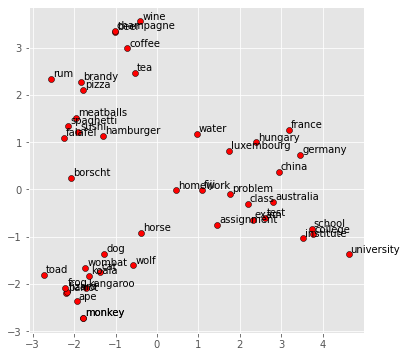

In [26]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

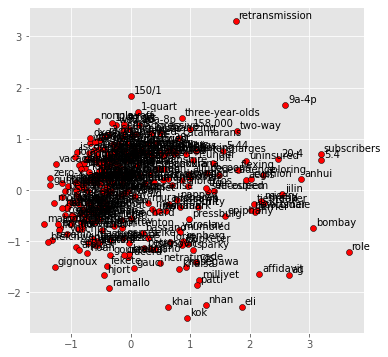

In [27]:
display_pca_scatterplot(model, sample=300)